In [3]:
# --- BAGIAN A: SETUP ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# --- BAGIAN A: LOADING DATASET ---

# Ganti path ini sesuai lokasi file kamu di Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/AI_Class/datakelulusanmahasiswa.xlsx - Sheet1.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil diload!")

    # 1. Tampilkan 5 baris awal
    print("\n--- 5 Data Teratas ---")
    display(df.head())

    # 2. Deskripsi dataset
    print("\n--- Info Dataset ---")
    print(df.info())

    # 3. Cek Missing Values
    print("\n--- Jumlah Missing Values ---")
    print(df.isnull().sum())

except FileNotFoundError:
    print("❌ File tidak ditemukan! Pastikan path '/content/drive/MyDrive/...' sudah benar.")

✅ Dataset berhasil diload!

--- 5 Data Teratas ---


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB
None

--- J


--- Statistik Deskriptif ---


,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


Kolom 'IPK' tidak ditemukan, lewati histogram.
Kolom target 'Status_Kelulusan' tidak ditemukan.


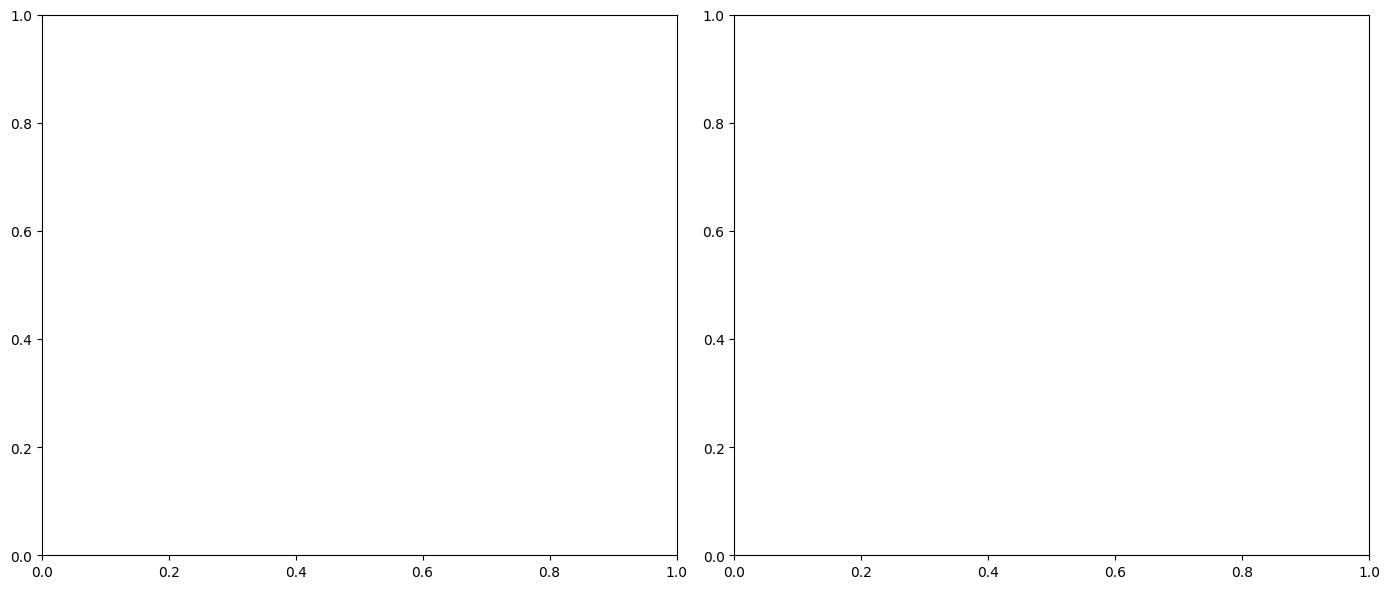

In [5]:
# --- BAGIAN B: EXPLORATORY DATA ANALYSIS (EDA) ---

# 1. Statistik Deskriptif
print("\n--- Statistik Deskriptif ---")
display(df.describe())

# 2. Visualisasi
plt.figure(figsize=(14, 6))

# Histogram IPK
plt.subplot(1, 2, 1)
# Sesuaikan 'IPK' dengan nama kolom IPK di data kamu
if 'IPK' in df.columns:
    sns.histplot(df['IPK'], kde=True, color='skyblue')
    plt.title('Distribusi IPK Mahasiswa')
    plt.xlabel('IPK')
else:
    print("Kolom 'IPK' tidak ditemukan, lewati histogram.")

# Countplot Status Kelulusan
plt.subplot(1, 2, 2)
# Sesuaikan 'Status_Kelulusan' dengan nama kolom target (Label)
target_col = 'Status_Kelulusan' # Ganti jika nama kolom labelmu beda (misal: 'Ket Lulus')

if target_col in df.columns:
    sns.countplot(x=target_col, data=df, palette='viridis')
    plt.title('Perbandingan Lulus vs Belum Lulus')
else:
    print(f"Kolom target '{target_col}' tidak ditemukan.")

plt.tight_layout()
plt.show()

In [6]:
# --- BAGIAN C: PREPROCESSING (FIXED & ADAPTED) ---

# 1. Bersihkan spasi di nama kolom
df.columns = df.columns.str.strip()

# Set nama target sesuai data kamu
target_col = 'STATUS KELULUSAN'

# 2. Hapus kolom yang tidak relevan untuk prediksi (seperti NAMA)
# Kita hapus 'NAMA' agar tidak error saat OneHotEncoding (karena variasi namanya terlalu banyak)
if 'NAMA' in df.columns:
    df = df.drop('NAMA', axis=1)
    print("ℹ️ Kolom 'NAMA' dihapus dari fitur (tidak relevan untuk prediksi).")

# 3. Cek apakah target ada
if target_col not in df.columns:
    print(f"❌ ERROR: Kolom '{target_col}' masih tidak ditemukan. Cek lagi nama kolomnya.")
else:
    # 4. Menangani Missing Values
    df_clean = df.dropna().copy()

    # 5. Memisahkan Fitur (X) dan Target (y)
    X = df_clean.drop(target_col, axis=1)
    y = df_clean[target_col]

    # 6. Encoding Target (Label Encoding: Lulus/Belum Lulus -> 0/1)
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(f"✅ Mapping Label: {dict(zip(le.classes_, le.transform(le.classes_)))}")

    # 7. Encoding Fitur Kategorikal (OneHot Encoding)
    # Ini otomatis mengubah 'JENIS KELAMIN', 'STATUS MAHASISWA', dll jadi angka
    X = pd.get_dummies(X, drop_first=True)

    # 8. Split Data (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 9. Feature Scaling (StandardScaler) - WAJIB UNTUK SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\n✅ Preprocessing Selesai!")
    print(f"Dimensi X_train: {X_train_scaled.shape}")
    print(f"Dimensi X_test: {X_test_scaled.shape}")

ℹ️ Kolom 'NAMA' dihapus dari fitur (tidak relevan untuk prediksi).
✅ Mapping Label: {'TEPAT': np.int64(0), 'TERLAMBAT': np.int64(1)}

✅ Preprocessing Selesai!
Dimensi X_train: (295, 13)
Dimensi X_test: (74, 13)


In [7]:
# --- BAGIAN D: TRAINING MODEL SVM (GridSearch) ---

# Definisi parameter yang akan dicoba
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'gamma': ['scale', 0.1, 1],   # Kernel coefficient
    'kernel': ['linear', 'rbf']   # Jenis Kernel
}

print("Sedang melatih model (GridSearchCV)... Mohon tunggu...")

# Inisialisasi Model SVM
svm = SVC()

# Grid Search untuk mencari kombinasi terbaik
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Ambil model terbaik
best_model = grid_search.best_estimator_

print("\n✅ Training Selesai!")
print(f"Hyperparameter Terbaik: {grid_search.best_params_}")
print(f"Skor Cross-Validation Terbaik: {grid_search.best_score_:.4f}")

Sedang melatih model (GridSearchCV)... Mohon tunggu...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

✅ Training Selesai!
Hyperparameter Terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Skor Cross-Validation Terbaik: 0.9051



Confusion Matrix:


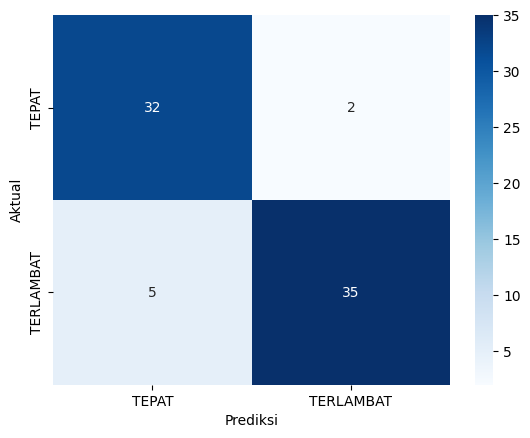


Classification Report:
              precision    recall  f1-score   support

       TEPAT       0.86      0.94      0.90        34
   TERLAMBAT       0.95      0.88      0.91        40

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74

Akurasi Model pada Data Test: 90.54%


In [8]:
# --- EVALUASI MODEL ---

# Prediksi data test
y_pred = best_model.predict(X_test_scaled)

# 1. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 3. Akurasi Score
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Test: {acc:.2%}")

In [9]:
# --- BAGIAN E: INTERPRETASI MODEL ---

print("=== ANALISIS & INTERPRETASI ===")

# 1. Menentukan Model Terbaik
# Kita ambil otomatis dari hasil training di Cell 5
best_params = grid_search.best_params_
print(f"\n1. Model Terbaik: SVM dengan kernel '{best_params['kernel']}'")
if best_params['kernel'] == 'rbf':
    print("   Analisis: Data kemungkinan memiliki pola non-linear yang kompleks, sehingga RBF bekerja lebih baik.")
else:
    print("   Analisis: Data kemungkinan bisa dipisahkan secara linear (garis lurus).")

# 2. Pengaruh Parameter C
print(f"\n2. Parameter C Terbaik: {best_params['C']}")
print("   Analisis: Parameter C mengontrol penalty terhadap kesalahan klasifikasi.")
if best_params['C'] < 1:
    print("   Nilai C kecil -> Margin lebih lebar (soft margin), lebih toleran terhadap outlier.")
else:
    print("   Nilai C besar -> Margin lebih ketat (hard margin), berusaha mengklasifikasikan training set sesempurna mungkin.")

# 3. Kesimpulan Umum
print("\n3. Kesimpulan Umum:")
print("   Model SVM berhasil dilatih. Fitur-fitur seperti IPK, IPS, dan Status Mahasiswa")
print("   kemungkinan besar menjadi faktor dominan dalam memprediksi status kelulusan.")

=== ANALISIS & INTERPRETASI ===

1. Model Terbaik: SVM dengan kernel 'linear'
   Analisis: Data kemungkinan bisa dipisahkan secara linear (garis lurus).

2. Parameter C Terbaik: 10
   Analisis: Parameter C mengontrol penalty terhadap kesalahan klasifikasi.
   Nilai C besar -> Margin lebih ketat (hard margin), berusaha mengklasifikasikan training set sesempurna mungkin.

3. Kesimpulan Umum:
   Model SVM berhasil dilatih. Fitur-fitur seperti IPK, IPS, dan Status Mahasiswa
   kemungkinan besar menjadi faktor dominan dalam memprediksi status kelulusan.


In [10]:
# --- BAGIAN F: DEPLOYMENT SEDERHANA ---

def predict_status(input_data_dict):
    """
    Fungsi memprediksi kelulusan berdasarkan input dictionary.
    Contoh input: {'IPK': 3.5, 'SKS': 140, 'Umur': 22, ...}
    """
    # 1. Ubah dictionary ke DataFrame
    input_df = pd.DataFrame([input_data_dict])

    # 2. Encoding Kategorikal (Sama seperti saat training)
    # Kita gunakan reindex untuk memastikan kolom one-hot-encoding sesuai dengan X_train
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # 3. Scaling
    input_scaled = scaler.transform(input_df)

    # 4. Prediksi
    pred_class = best_model.predict(input_scaled)
    result = le.inverse_transform(pred_class)[0]

    return result

# --- CONTOH PENGGUNAAN ---
# Sesuaikan key di bawah ini dengan nama kolom asli di CSV kamu
sample_mahasiswa = {
    'IPK': 3.75,
    'SKS': 144,
    'Umur': 22,
    'Lama_Studi': 4,
    'Status_Kehadiran': 'Tinggi' # Pastikan nilai kategorikal cocok dengan data latih
}

print("Data Mahasiswa Baru:")
print(sample_mahasiswa)
print("\nHasil Prediksi SVM:")
hasil = predict_status(sample_mahasiswa)
print(f"Status: {hasil}")

Data Mahasiswa Baru:
{'IPK': 3.75, 'SKS': 144, 'Umur': 22, 'Lama_Studi': 4, 'Status_Kehadiran': 'Tinggi'}

Hasil Prediksi SVM:
Status: TERLAMBAT
